# Class Challenge: Image Classification of COVID-19 X-rays
# Task 1 [Total points: 30]

## Setup

* This assignment involves the following packages: 'matplotlib', 'numpy', and 'sklearn'. 

* If you are using conda, use the following commands to install the above packages:<br>
```shell
conda install matplotlib
conda install numpy
conda install -c anaconda scikit-learn
```

* If you are using pip, use use the following commands to install the above packages: <br> 
```shell
pip install matplotlib
pip install numpy
pip install sklearn
```

## Data

Please download the data using the following link: [COVID-19](https://drive.google.com/file/d/1Y88tgqpQ1Pjko_7rntcPowOJs_QNOrJ-/view). 

* After downloading 'Covid_Data_GradientCrescent.zip', unzip the file and you should see the following data structure:


|--all<br>
|--------train<br>
|--------test<br>
|--two<br>
|--------train<br>
|--------test<br>


* Put the 'all' folder, the 'two' folder and this python notebook in the **same directory** so that the following code can correctly locate the data.  



## [20 points] Binary Classification: COVID-19 vs. Normal

In [1]:
import os

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

os.environ['OMP_NUM_THREADS'] = '1'
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
tf.__version__

2021-12-30 00:01:17.985095: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-30 00:01:17.985140: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


'2.8.0-rc0'

#### Load Image Data

In [2]:
DATA_LIST = os.listdir('two/train')
DATASET_PATH  = 'two/train'
TEST_DIR =  'two/test'
IMAGE_SIZE    = (224, 224)
NUM_CLASSES   = len(DATA_LIST)
BATCH_SIZE    = 10  # try reducing batch size or freeze more layers if your GPU runs out of memory
NUM_EPOCHS    = 40
LEARNING_RATE = 0.0005 # start off with high rate first 0.001 and experiment with reducing it gradually 

#### Generate Training and Validation Batches

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=50,featurewise_center = True,
                                   featurewise_std_normalization = True,width_shift_range=0.2,
                                   height_shift_range=0.2,shear_range=0.25,zoom_range=0.1,
                                   zca_whitening = True,channel_shift_range = 20,
                                   horizontal_flip = True,vertical_flip = True,
                                   validation_split = 0.2,fill_mode='constant')

train_batches = train_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  shuffle=True,batch_size=BATCH_SIZE,
                                                  subset = "training",seed=42,
                                                  class_mode="binary")

valid_batches = train_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  shuffle=True,batch_size=BATCH_SIZE,
                                                  subset = "validation",seed=42,
                                                  class_mode="binary")

Found 104 images belonging to 2 classes.
Found 26 images belonging to 2 classes.


/usr/lib/python3.10/site-packages/keras_preprocessing/image/image_data_generator.py:342: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn('This ImageDataGenerator specifies '


#### [10 points] Build Model
Hint: Starting from a pre-trained model typically helps performance on a new task, e.g. starting with weights obtained by training on ImageNet. 

In [4]:

from tensorflow.keras import Sequential
model = Sequential()
base = tf.keras.applications.VGG16(
                include_top=False, weights='imagenet', input_tensor=None,
            input_shape=(224,224,3), pooling=None, classes=1000,
            classifier_activation='softmax'
            )
base.trainable = False
model.add(base)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.build(input_shape=(None, 224,224,3))
model.summary()

2021-12-30 00:01:20.688548: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-12-30 00:01:20.688590: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: danASUS
2021-12-30 00:01:20.688596: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: danASUS
2021-12-30 00:01:20.688730: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 495.46.0
2021-12-30 00:01:20.688763: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 495.46.0
2021-12-30 00:01:20.688768: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 495.46.0
2021-12-30 00:01:20.689213: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in pe

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 21,137,729
Trainable params: 6,423,041
Non-trainable params: 14,714,688
_________________________________________________________________


#### [5 points] Train Model

In [5]:
#FIT MODEL
print(len(train_batches))
print(len(valid_batches))

STEP_SIZE_TRAIN=train_batches.n//train_batches.batch_size
STEP_SIZE_VALID=valid_batches.n//valid_batches.batch_size

#model = testCNN()
model.build(input_shape=(None,224,224,3))
model.summary()


model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = LEARNING_RATE),  loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])
history = model.fit(train_batches, epochs = 10, validation_data=valid_batches)

11
3
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 21,137,729
Trainable params: 6,423,041
Non-trainable params: 14,714,688
_________________________________________________________________


/usr/lib/python3.10/site-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/lib/python3.10/site-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/10


/usr/lib/python3.10/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
2021-12-30 00:01:27.333498: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 128450560 exceeds 10% of free system memory.
2021-12-30 00:01:27.454394: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 128450560 exceeds 10% of free system memory.


 1/11 [=>............................] - ETA: 46s - loss: 0.7602 - accuracy: 0.4000

2021-12-30 00:01:30.323545: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 128450560 exceeds 10% of free system memory.
2021-12-30 00:01:30.386885: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 128450560 exceeds 10% of free system memory.


 3/11 [=======>......................] - ETA: 17s - loss: 3.0744 - accuracy: 0.5000

2021-12-30 00:01:34.599288: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 128450560 exceeds 10% of free system memory.


11/11 [==============================] - 40s 3s/step - loss: 1.8784 - accuracy: 0.4615 - val_loss: 0.5823 - val_accuracy: 0.5769
Epoch 2/10
11/11 [==============================] - 37s 3s/step - loss: 0.5948 - accuracy: 0.6058 - val_loss: 0.4973 - val_accuracy: 0.6538
Epoch 3/10
11/11 [==============================] - 36s 3s/step - loss: 0.4487 - accuracy: 0.7981 - val_loss: 0.2698 - val_accuracy: 0.9231
Epoch 4/10
11/11 [==============================] - 36s 3s/step - loss: 0.3680 - accuracy: 0.8654 - val_loss: 0.3112 - val_accuracy: 0.8846
Epoch 5/10
11/11 [==============================] - 34s 3s/step - loss: 0.3014 - accuracy: 0.8654 - val_loss: 0.1676 - val_accuracy: 0.9615
Epoch 6/10
11/11 [==============================] - 34s 3s/step - loss: 0.2602 - accuracy: 0.9038 - val_loss: 0.1621 - val_accuracy: 0.9231
Epoch 7/10
11/11 [==============================] - 36s 3s/step - loss: 0.3404 - accuracy: 0.8750 - val_loss: 0.1219 - val_accuracy: 0.9615
Epoch 8/10
11/11 [=============

#### [5 points] Plot Accuracy and Loss During Training

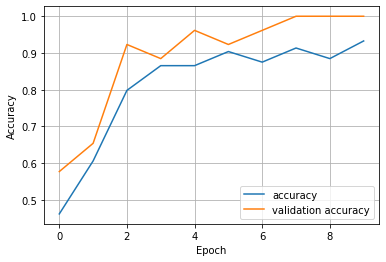

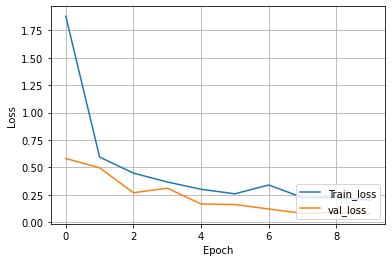

In [6]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid()
plt.show()

plt.plot(history.history['loss'], label='Train_loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')
plt.grid()
plt.show()

#### Plot Test Results

Found 18 images belonging to 2 classes.


/tmp/ipykernel_44887/3945956793.py:7: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred = model.predict_generator(eval_generator,18,verbose=1)


18/18 [==============================] - 5s 258ms/step
covid/nejmoa2001191_f3-PA.jpeg


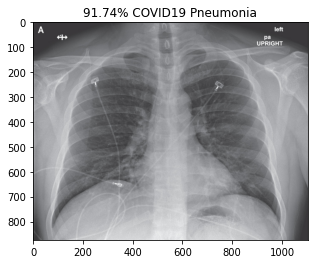

['covid/nejmoa2001191_f3-PA.jpeg', '91.74% COVID19 Pneumonia']
covid/nejmoa2001191_f4.jpeg


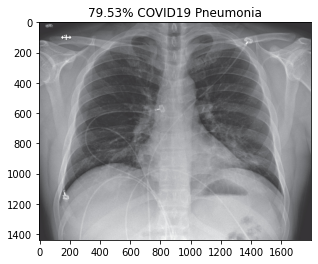

['covid/nejmoa2001191_f3-PA.jpeg', '91.74% COVID19 Pneumonia', 'covid/nejmoa2001191_f4.jpeg', '79.53% COVID19 Pneumonia']
covid/nejmoa2001191_f5-PA.jpeg


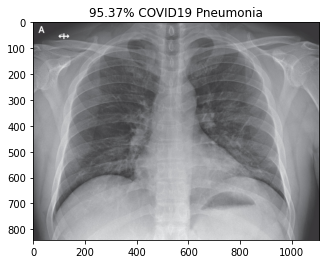

['covid/nejmoa2001191_f3-PA.jpeg', '91.74% COVID19 Pneumonia', 'covid/nejmoa2001191_f4.jpeg', '79.53% COVID19 Pneumonia', 'covid/nejmoa2001191_f5-PA.jpeg', '95.37% COVID19 Pneumonia']
covid/radiol.2020200490.fig3.jpeg


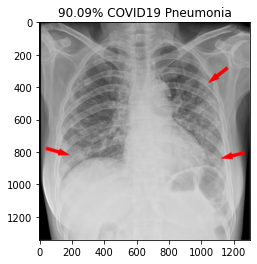

['covid/nejmoa2001191_f3-PA.jpeg', '91.74% COVID19 Pneumonia', 'covid/nejmoa2001191_f4.jpeg', '79.53% COVID19 Pneumonia', 'covid/nejmoa2001191_f5-PA.jpeg', '95.37% COVID19 Pneumonia', 'covid/radiol.2020200490.fig3.jpeg', '90.09% COVID19 Pneumonia']
covid/ryct.2020200028.fig1a.jpeg


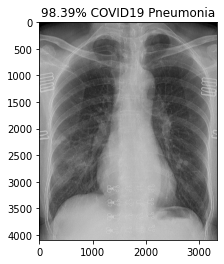

['covid/nejmoa2001191_f3-PA.jpeg', '91.74% COVID19 Pneumonia', 'covid/nejmoa2001191_f4.jpeg', '79.53% COVID19 Pneumonia', 'covid/nejmoa2001191_f5-PA.jpeg', '95.37% COVID19 Pneumonia', 'covid/radiol.2020200490.fig3.jpeg', '90.09% COVID19 Pneumonia', 'covid/ryct.2020200028.fig1a.jpeg', '98.39% COVID19 Pneumonia']
covid/ryct.2020200034.fig2.jpeg


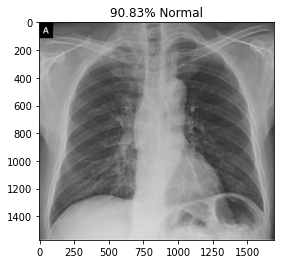

['covid/nejmoa2001191_f3-PA.jpeg', '91.74% COVID19 Pneumonia', 'covid/nejmoa2001191_f4.jpeg', '79.53% COVID19 Pneumonia', 'covid/nejmoa2001191_f5-PA.jpeg', '95.37% COVID19 Pneumonia', 'covid/radiol.2020200490.fig3.jpeg', '90.09% COVID19 Pneumonia', 'covid/ryct.2020200028.fig1a.jpeg', '98.39% COVID19 Pneumonia', 'covid/ryct.2020200034.fig2.jpeg', '90.83% Normal']
covid/ryct.2020200034.fig5-day0.jpeg


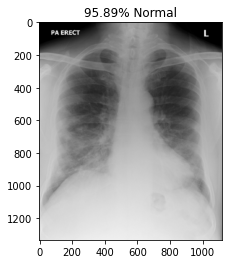

['covid/nejmoa2001191_f3-PA.jpeg', '91.74% COVID19 Pneumonia', 'covid/nejmoa2001191_f4.jpeg', '79.53% COVID19 Pneumonia', 'covid/nejmoa2001191_f5-PA.jpeg', '95.37% COVID19 Pneumonia', 'covid/radiol.2020200490.fig3.jpeg', '90.09% COVID19 Pneumonia', 'covid/ryct.2020200028.fig1a.jpeg', '98.39% COVID19 Pneumonia', 'covid/ryct.2020200034.fig2.jpeg', '90.83% Normal', 'covid/ryct.2020200034.fig5-day0.jpeg', '95.89% Normal']
covid/ryct.2020200034.fig5-day4.jpeg


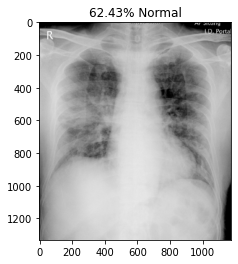

['covid/nejmoa2001191_f3-PA.jpeg', '91.74% COVID19 Pneumonia', 'covid/nejmoa2001191_f4.jpeg', '79.53% COVID19 Pneumonia', 'covid/nejmoa2001191_f5-PA.jpeg', '95.37% COVID19 Pneumonia', 'covid/radiol.2020200490.fig3.jpeg', '90.09% COVID19 Pneumonia', 'covid/ryct.2020200028.fig1a.jpeg', '98.39% COVID19 Pneumonia', 'covid/ryct.2020200034.fig2.jpeg', '90.83% Normal', 'covid/ryct.2020200034.fig5-day0.jpeg', '95.89% Normal', 'covid/ryct.2020200034.fig5-day4.jpeg', '62.43% Normal']
covid/ryct.2020200034.fig5-day7.jpeg


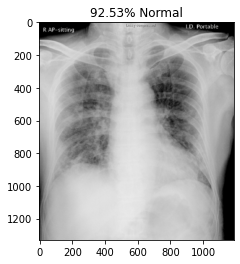

['covid/nejmoa2001191_f3-PA.jpeg', '91.74% COVID19 Pneumonia', 'covid/nejmoa2001191_f4.jpeg', '79.53% COVID19 Pneumonia', 'covid/nejmoa2001191_f5-PA.jpeg', '95.37% COVID19 Pneumonia', 'covid/radiol.2020200490.fig3.jpeg', '90.09% COVID19 Pneumonia', 'covid/ryct.2020200028.fig1a.jpeg', '98.39% COVID19 Pneumonia', 'covid/ryct.2020200034.fig2.jpeg', '90.83% Normal', 'covid/ryct.2020200034.fig5-day0.jpeg', '95.89% Normal', 'covid/ryct.2020200034.fig5-day4.jpeg', '62.43% Normal', 'covid/ryct.2020200034.fig5-day7.jpeg', '92.53% Normal']
normal/NORMAL2-IM-1385-0001.jpeg


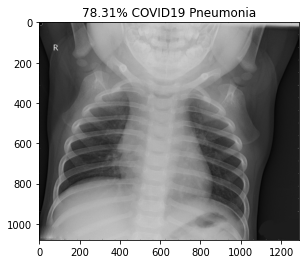

['covid/nejmoa2001191_f3-PA.jpeg', '91.74% COVID19 Pneumonia', 'covid/nejmoa2001191_f4.jpeg', '79.53% COVID19 Pneumonia', 'covid/nejmoa2001191_f5-PA.jpeg', '95.37% COVID19 Pneumonia', 'covid/radiol.2020200490.fig3.jpeg', '90.09% COVID19 Pneumonia', 'covid/ryct.2020200028.fig1a.jpeg', '98.39% COVID19 Pneumonia', 'covid/ryct.2020200034.fig2.jpeg', '90.83% Normal', 'covid/ryct.2020200034.fig5-day0.jpeg', '95.89% Normal', 'covid/ryct.2020200034.fig5-day4.jpeg', '62.43% Normal', 'covid/ryct.2020200034.fig5-day7.jpeg', '92.53% Normal', 'normal/NORMAL2-IM-1385-0001.jpeg', '78.31% COVID19 Pneumonia']
normal/NORMAL2-IM-1396-0001.jpeg


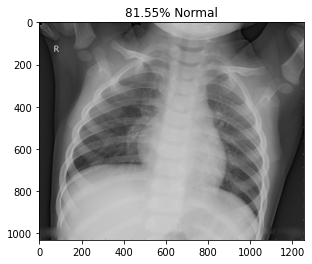

['covid/nejmoa2001191_f3-PA.jpeg', '91.74% COVID19 Pneumonia', 'covid/nejmoa2001191_f4.jpeg', '79.53% COVID19 Pneumonia', 'covid/nejmoa2001191_f5-PA.jpeg', '95.37% COVID19 Pneumonia', 'covid/radiol.2020200490.fig3.jpeg', '90.09% COVID19 Pneumonia', 'covid/ryct.2020200028.fig1a.jpeg', '98.39% COVID19 Pneumonia', 'covid/ryct.2020200034.fig2.jpeg', '90.83% Normal', 'covid/ryct.2020200034.fig5-day0.jpeg', '95.89% Normal', 'covid/ryct.2020200034.fig5-day4.jpeg', '62.43% Normal', 'covid/ryct.2020200034.fig5-day7.jpeg', '92.53% Normal', 'normal/NORMAL2-IM-1385-0001.jpeg', '78.31% COVID19 Pneumonia', 'normal/NORMAL2-IM-1396-0001.jpeg', '81.55% Normal']
normal/NORMAL2-IM-1400-0001.jpeg


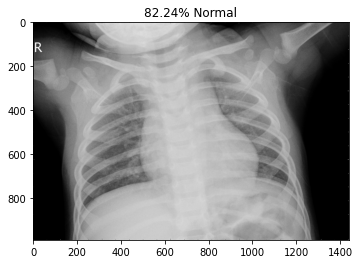

['covid/nejmoa2001191_f3-PA.jpeg', '91.74% COVID19 Pneumonia', 'covid/nejmoa2001191_f4.jpeg', '79.53% COVID19 Pneumonia', 'covid/nejmoa2001191_f5-PA.jpeg', '95.37% COVID19 Pneumonia', 'covid/radiol.2020200490.fig3.jpeg', '90.09% COVID19 Pneumonia', 'covid/ryct.2020200028.fig1a.jpeg', '98.39% COVID19 Pneumonia', 'covid/ryct.2020200034.fig2.jpeg', '90.83% Normal', 'covid/ryct.2020200034.fig5-day0.jpeg', '95.89% Normal', 'covid/ryct.2020200034.fig5-day4.jpeg', '62.43% Normal', 'covid/ryct.2020200034.fig5-day7.jpeg', '92.53% Normal', 'normal/NORMAL2-IM-1385-0001.jpeg', '78.31% COVID19 Pneumonia', 'normal/NORMAL2-IM-1396-0001.jpeg', '81.55% Normal', 'normal/NORMAL2-IM-1400-0001.jpeg', '82.24% Normal']
normal/NORMAL2-IM-1401-0001.jpeg


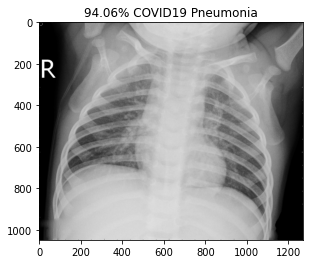

['covid/nejmoa2001191_f3-PA.jpeg', '91.74% COVID19 Pneumonia', 'covid/nejmoa2001191_f4.jpeg', '79.53% COVID19 Pneumonia', 'covid/nejmoa2001191_f5-PA.jpeg', '95.37% COVID19 Pneumonia', 'covid/radiol.2020200490.fig3.jpeg', '90.09% COVID19 Pneumonia', 'covid/ryct.2020200028.fig1a.jpeg', '98.39% COVID19 Pneumonia', 'covid/ryct.2020200034.fig2.jpeg', '90.83% Normal', 'covid/ryct.2020200034.fig5-day0.jpeg', '95.89% Normal', 'covid/ryct.2020200034.fig5-day4.jpeg', '62.43% Normal', 'covid/ryct.2020200034.fig5-day7.jpeg', '92.53% Normal', 'normal/NORMAL2-IM-1385-0001.jpeg', '78.31% COVID19 Pneumonia', 'normal/NORMAL2-IM-1396-0001.jpeg', '81.55% Normal', 'normal/NORMAL2-IM-1400-0001.jpeg', '82.24% Normal', 'normal/NORMAL2-IM-1401-0001.jpeg', '94.06% COVID19 Pneumonia']
normal/NORMAL2-IM-1406-0001.jpeg


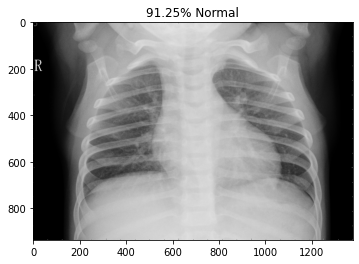

['covid/nejmoa2001191_f3-PA.jpeg', '91.74% COVID19 Pneumonia', 'covid/nejmoa2001191_f4.jpeg', '79.53% COVID19 Pneumonia', 'covid/nejmoa2001191_f5-PA.jpeg', '95.37% COVID19 Pneumonia', 'covid/radiol.2020200490.fig3.jpeg', '90.09% COVID19 Pneumonia', 'covid/ryct.2020200028.fig1a.jpeg', '98.39% COVID19 Pneumonia', 'covid/ryct.2020200034.fig2.jpeg', '90.83% Normal', 'covid/ryct.2020200034.fig5-day0.jpeg', '95.89% Normal', 'covid/ryct.2020200034.fig5-day4.jpeg', '62.43% Normal', 'covid/ryct.2020200034.fig5-day7.jpeg', '92.53% Normal', 'normal/NORMAL2-IM-1385-0001.jpeg', '78.31% COVID19 Pneumonia', 'normal/NORMAL2-IM-1396-0001.jpeg', '81.55% Normal', 'normal/NORMAL2-IM-1400-0001.jpeg', '82.24% Normal', 'normal/NORMAL2-IM-1401-0001.jpeg', '94.06% COVID19 Pneumonia', 'normal/NORMAL2-IM-1406-0001.jpeg', '91.25% Normal']
normal/NORMAL2-IM-1412-0001.jpeg


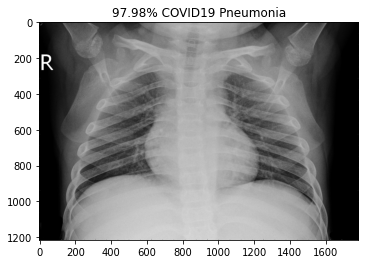

['covid/nejmoa2001191_f3-PA.jpeg', '91.74% COVID19 Pneumonia', 'covid/nejmoa2001191_f4.jpeg', '79.53% COVID19 Pneumonia', 'covid/nejmoa2001191_f5-PA.jpeg', '95.37% COVID19 Pneumonia', 'covid/radiol.2020200490.fig3.jpeg', '90.09% COVID19 Pneumonia', 'covid/ryct.2020200028.fig1a.jpeg', '98.39% COVID19 Pneumonia', 'covid/ryct.2020200034.fig2.jpeg', '90.83% Normal', 'covid/ryct.2020200034.fig5-day0.jpeg', '95.89% Normal', 'covid/ryct.2020200034.fig5-day4.jpeg', '62.43% Normal', 'covid/ryct.2020200034.fig5-day7.jpeg', '92.53% Normal', 'normal/NORMAL2-IM-1385-0001.jpeg', '78.31% COVID19 Pneumonia', 'normal/NORMAL2-IM-1396-0001.jpeg', '81.55% Normal', 'normal/NORMAL2-IM-1400-0001.jpeg', '82.24% Normal', 'normal/NORMAL2-IM-1401-0001.jpeg', '94.06% COVID19 Pneumonia', 'normal/NORMAL2-IM-1406-0001.jpeg', '91.25% Normal', 'normal/NORMAL2-IM-1412-0001.jpeg', '97.98% COVID19 Pneumonia']
normal/NORMAL2-IM-1419-0001.jpeg


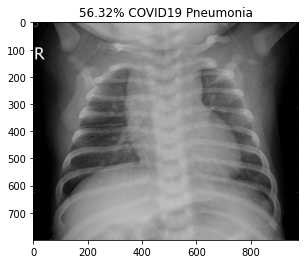

['covid/nejmoa2001191_f3-PA.jpeg', '91.74% COVID19 Pneumonia', 'covid/nejmoa2001191_f4.jpeg', '79.53% COVID19 Pneumonia', 'covid/nejmoa2001191_f5-PA.jpeg', '95.37% COVID19 Pneumonia', 'covid/radiol.2020200490.fig3.jpeg', '90.09% COVID19 Pneumonia', 'covid/ryct.2020200028.fig1a.jpeg', '98.39% COVID19 Pneumonia', 'covid/ryct.2020200034.fig2.jpeg', '90.83% Normal', 'covid/ryct.2020200034.fig5-day0.jpeg', '95.89% Normal', 'covid/ryct.2020200034.fig5-day4.jpeg', '62.43% Normal', 'covid/ryct.2020200034.fig5-day7.jpeg', '92.53% Normal', 'normal/NORMAL2-IM-1385-0001.jpeg', '78.31% COVID19 Pneumonia', 'normal/NORMAL2-IM-1396-0001.jpeg', '81.55% Normal', 'normal/NORMAL2-IM-1400-0001.jpeg', '82.24% Normal', 'normal/NORMAL2-IM-1401-0001.jpeg', '94.06% COVID19 Pneumonia', 'normal/NORMAL2-IM-1406-0001.jpeg', '91.25% Normal', 'normal/NORMAL2-IM-1412-0001.jpeg', '97.98% COVID19 Pneumonia', 'normal/NORMAL2-IM-1419-0001.jpeg', '56.32% COVID19 Pneumonia']
normal/NORMAL2-IM-1422-0001.jpeg


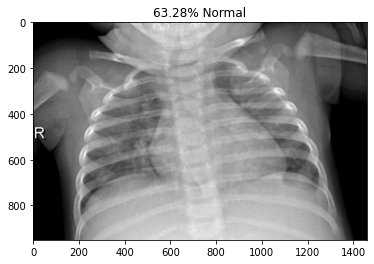

['covid/nejmoa2001191_f3-PA.jpeg', '91.74% COVID19 Pneumonia', 'covid/nejmoa2001191_f4.jpeg', '79.53% COVID19 Pneumonia', 'covid/nejmoa2001191_f5-PA.jpeg', '95.37% COVID19 Pneumonia', 'covid/radiol.2020200490.fig3.jpeg', '90.09% COVID19 Pneumonia', 'covid/ryct.2020200028.fig1a.jpeg', '98.39% COVID19 Pneumonia', 'covid/ryct.2020200034.fig2.jpeg', '90.83% Normal', 'covid/ryct.2020200034.fig5-day0.jpeg', '95.89% Normal', 'covid/ryct.2020200034.fig5-day4.jpeg', '62.43% Normal', 'covid/ryct.2020200034.fig5-day7.jpeg', '92.53% Normal', 'normal/NORMAL2-IM-1385-0001.jpeg', '78.31% COVID19 Pneumonia', 'normal/NORMAL2-IM-1396-0001.jpeg', '81.55% Normal', 'normal/NORMAL2-IM-1400-0001.jpeg', '82.24% Normal', 'normal/NORMAL2-IM-1401-0001.jpeg', '94.06% COVID19 Pneumonia', 'normal/NORMAL2-IM-1406-0001.jpeg', '91.25% Normal', 'normal/NORMAL2-IM-1412-0001.jpeg', '97.98% COVID19 Pneumonia', 'normal/NORMAL2-IM-1419-0001.jpeg', '56.32% COVID19 Pneumonia', 'normal/NORMAL2-IM-1422-0001.jpeg', '63.28% Norma

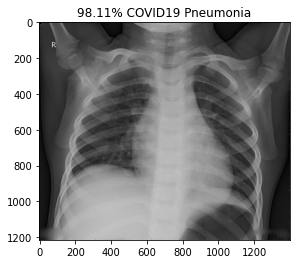

['covid/nejmoa2001191_f3-PA.jpeg', '91.74% COVID19 Pneumonia', 'covid/nejmoa2001191_f4.jpeg', '79.53% COVID19 Pneumonia', 'covid/nejmoa2001191_f5-PA.jpeg', '95.37% COVID19 Pneumonia', 'covid/radiol.2020200490.fig3.jpeg', '90.09% COVID19 Pneumonia', 'covid/ryct.2020200028.fig1a.jpeg', '98.39% COVID19 Pneumonia', 'covid/ryct.2020200034.fig2.jpeg', '90.83% Normal', 'covid/ryct.2020200034.fig5-day0.jpeg', '95.89% Normal', 'covid/ryct.2020200034.fig5-day4.jpeg', '62.43% Normal', 'covid/ryct.2020200034.fig5-day7.jpeg', '92.53% Normal', 'normal/NORMAL2-IM-1385-0001.jpeg', '78.31% COVID19 Pneumonia', 'normal/NORMAL2-IM-1396-0001.jpeg', '81.55% Normal', 'normal/NORMAL2-IM-1400-0001.jpeg', '82.24% Normal', 'normal/NORMAL2-IM-1401-0001.jpeg', '94.06% COVID19 Pneumonia', 'normal/NORMAL2-IM-1406-0001.jpeg', '91.25% Normal', 'normal/NORMAL2-IM-1412-0001.jpeg', '97.98% COVID19 Pneumonia', 'normal/NORMAL2-IM-1419-0001.jpeg', '56.32% COVID19 Pneumonia', 'normal/NORMAL2-IM-1422-0001.jpeg', '63.28% Norma

In [7]:
import matplotlib.image as mpimg

test_datagen = ImageDataGenerator(rescale=1. / 255)
eval_generator = test_datagen.flow_from_directory(TEST_DIR,target_size=IMAGE_SIZE,
                                                  batch_size=1,shuffle=True,seed=42,class_mode="binary")
eval_generator.reset()
pred = model.predict_generator(eval_generator,18,verbose=1)

record = []

for index, probability in enumerate(pred):
    image_path = TEST_DIR + "/" +eval_generator.filenames[index]
    image = mpimg.imread(image_path)
    if image.ndim < 3:
        image = np.reshape(image,(image.shape[0],image.shape[1],1))
        image = np.concatenate([image, image, image], 2)
#         print(image.shape)

    pixels = np.array(image)
    plt.imshow(pixels)
    
    print(eval_generator.filenames[index])
    record.append(eval_generator.filenames[index])
    if probability > 0.5:
        plt.title("%.2f" % (probability[0]*100) + "% Normal")
        record.append("%.2f" % (probability[0]*100) + "% Normal") 
    else:
        plt.title("%.2f" % ((1-probability[0])*100) + "% COVID19 Pneumonia")
        record.append("%.2f" % ((1-probability[0])*100) + "% COVID19 Pneumonia")
    plt.show()
    print(record)

## [10 points] TSNE Plot
t-Distributed Stochastic Neighbor Embedding (t-SNE) is a widely used technique for dimensionality reduction that is particularly well suited for the visualization of high-dimensional datasets. After training is complete, extract features from a specific deep layer of your choice, use t-SNE to reduce the dimensionality of your extracted features to 2 dimensions and plot the resulting 2D features.

Found 130 images belonging to 2 classes.
[0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1]


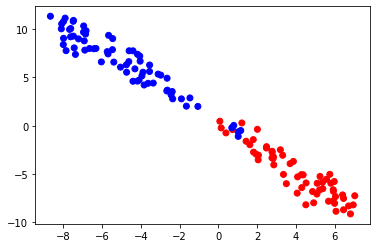

In [9]:
from sklearn.manifold import TSNE

intermediate_layer_model = tf.keras.models.Model(inputs=model.input,
                                        outputs=model.get_layer('dense').output)
tsne_data_generator = test_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  batch_size=1,shuffle=True,seed=42,class_mode="binary")
#print(type(tsne_data_generator))
classes = []
#print(len(tsne_data_generator))
for i in range(len(tsne_data_generator)):
    pix, class_val = tsne_data_generator[i]
    classes.append(int(class_val[0]))
print(classes)
out = intermediate_layer_model.predict(tsne_data_generator)
reduced = TSNE(n_components=2, learning_rate='auto',
                   init='random').fit_transform(out)
x = reduced[ :,0]
y = reduced[ :,1]
colormap = np.array(['red', 'blue', 'green', 'black'])
plt.scatter(x, y, c=colormap[classes])
plt.show()

<!-- ## Task 2: COVID-19 vs Normal vs Tertiary Pneumonia (Bacterial and Viral) -->

<!-- #### Renew Training Batch and Validation Batch -->

<!-- #### Renew Model -->